In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [9]:
Fraud=pd.read_csv('C:\\Users\\lenovo\\Downloads\\Fraud_check (1).csv')

In [10]:
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [11]:
Fraud.shape

(600, 6)

In [12]:
Fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [13]:
#checking null value
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


No null values 

In [14]:
Fraud[Fraud.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [15]:
Fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

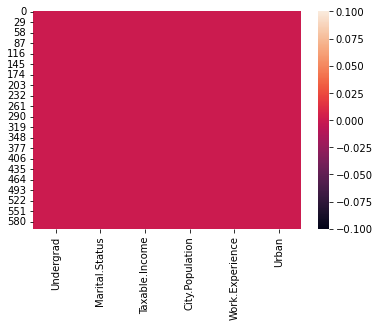

In [16]:
sns.heatmap(Fraud.isnull())

# outlier Detection

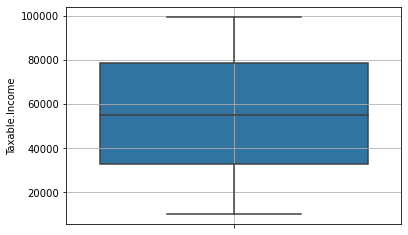

In [17]:
sns.boxplot(y="Taxable.Income",data=Fraud)
plt.grid()
plt.show()

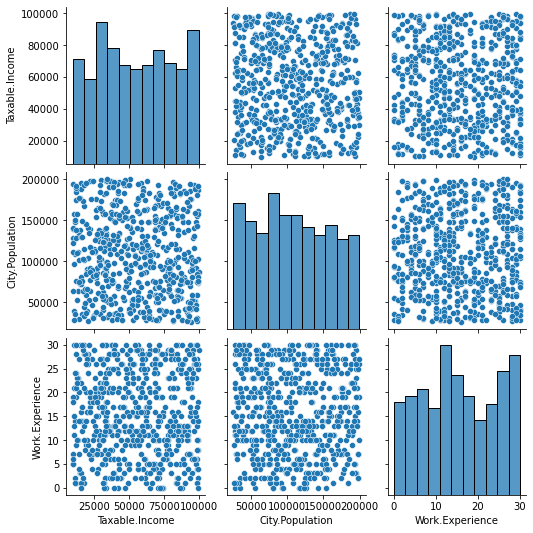

In [18]:
sns.pairplot(Fraud)
plt.show()

# Exploration Data Visuslizaion(EDA)

# Corelation Matrix

In [19]:
Fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


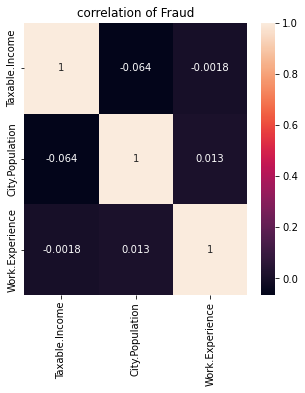

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(Fraud.corr(),annot=True)
plt.title("correlation of Fraud")
plt.show()

In [24]:
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Checking count of Categories for Categorical columns 

In [25]:
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


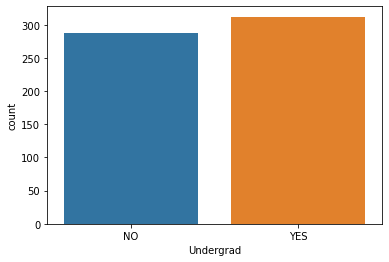

In [27]:
sns.countplot("Undergrad",data=Fraud)
plt.show()

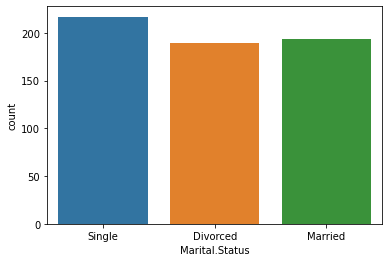

In [29]:
sns.countplot("Marital.Status",data=Fraud)
plt.show()

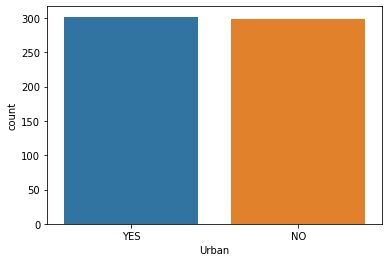

In [30]:
sns.countplot("Urban",data=Fraud)
plt.show()

# Convert object values to Numeric values

In [31]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [36]:
label_encoder= preprocessing.LabelEncoder()
Fraud['Undergrad']=label_encoder.fit_transform(Fraud['Undergrad'])
Fraud['Marital.Status']=label_encoder.fit_transform(Fraud['Marital.Status'])
Fraud['Urban']=label_encoder.fit_transform(Fraud['Urban'])

In [37]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [38]:
Fraud.rename(columns={"Marital.Status":"marital_status","Taxable.Income":"tax_in","City.Population":"city_popu","Work_Experience":"work_exp"},inplace=True)

In [39]:
Fraud["status"]=Fraud["tax_in"].apply(lambda tax_in:"Risky" if tax_in <=30000 else "Good")

In [40]:
Fraud.head()

,Undergrad,marital_status,tax_in,city_popu,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [41]:
Fraud.drop(["tax_in"],axis=1,inplace=True)

In [42]:
Fraud["status"]=label_encoder.fit_transform(Fraud["status"])

In [43]:
x=Fraud.iloc[:,0:5]
y=Fraud.iloc[:,-1]

In [44]:
x

,Undergrad,marital_status,city_popu,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [45]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int32

# spliting data into training and testing data set

In [47]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)

In [48]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(480, 5) (120, 5) (480,) (120,)


# Model Creation

In [51]:
from  sklearn.tree import DecisionTreeClassifier

In [52]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

# in a jupyter enviroment, pleace rerun this cell to show the HTML representation or trust the notebook.

# on gitHub,the HTML re[resentation is unable to render,please try loading this page with nbviewer.org.]

# Model Validation:Confusion Matrix

Training and Testing accuracy

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [54]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

In [55]:
cm

array([[73, 19],
       [21,  7]], dtype=int64)

In [56]:
test_acc=accuracy_score(y_test,y_pred)
test_acc

0.6666666666666666

In [57]:
y_pred1=model.predict(x_train)
train_acc=accuracy_score(y_train,y_pred1)
train_acc

1.0

# plot the Tree

In [58]:
from sklearn import tree

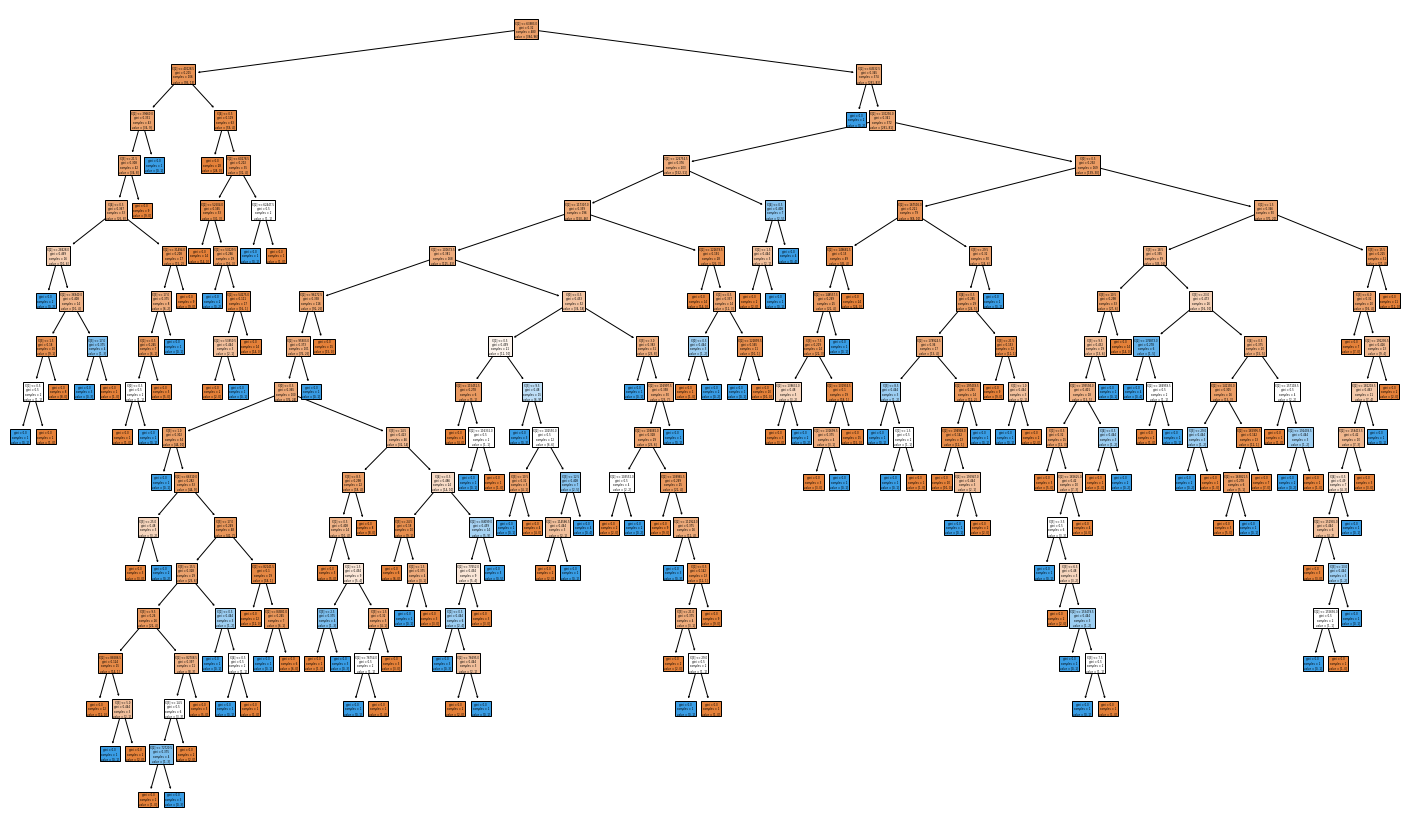

In [60]:
plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)
plt.show()

# k-fold testing

In [61]:
from sklearn.model_selection import KFold,cross_val_score

In [62]:
fold=KFold(n_splits=5,shuffle=False)

In [63]:
model1=DecisionTreeClassifier()

In [65]:
results=cross_val_score(model1,x,y,cv=fold)

In [66]:
results

array([0.66666667, 0.64166667, 0.625     , 0.575     , 0.70833333])

In [68]:
results.min(),results.max()

(0.575, 0.7083333333333334)

In [69]:
results.std()

0.04422166387140535

In [70]:
results.mean()

0.6433333333333333

# Final Model

In [71]:
final_model = DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [72]:
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

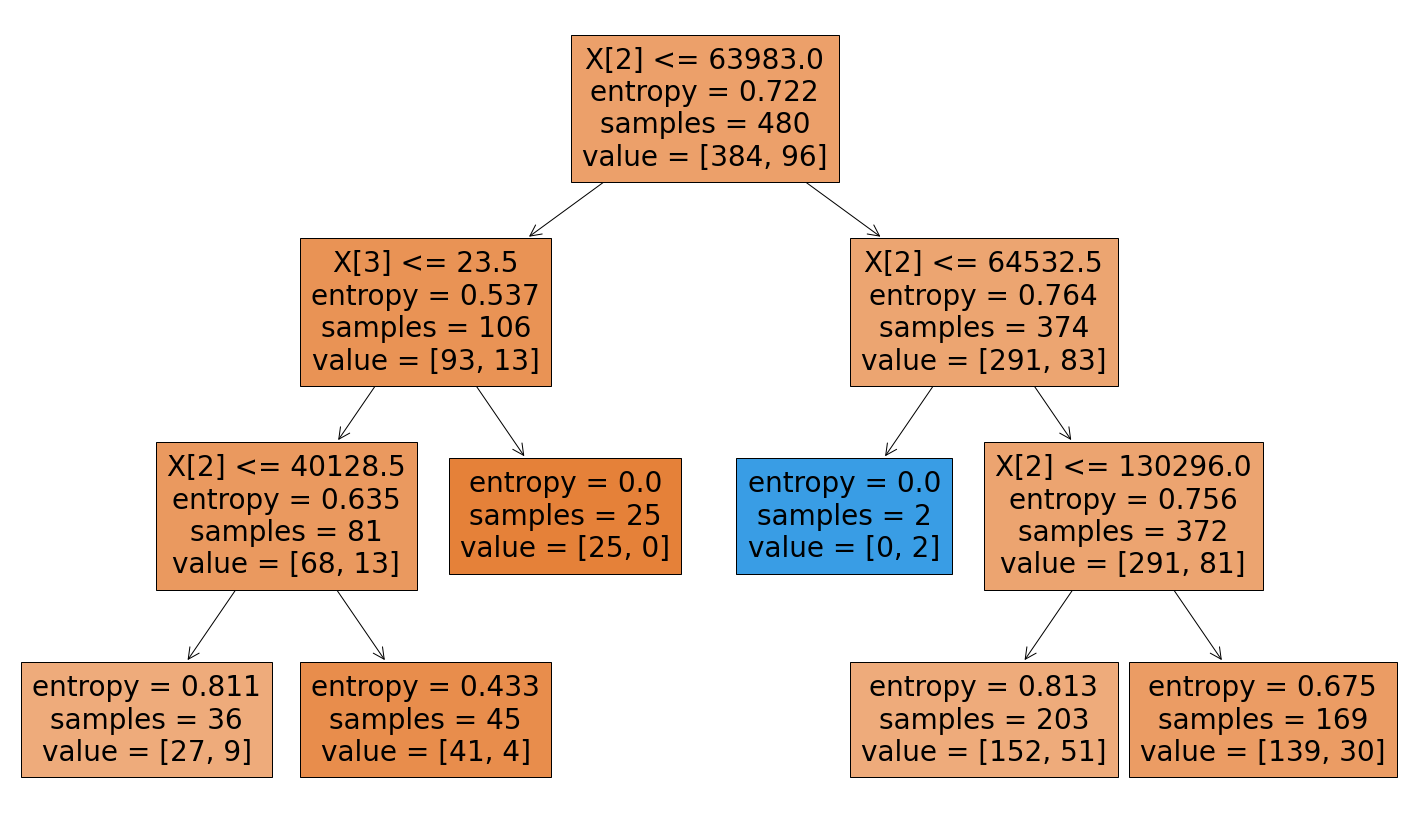

In [73]:
plt.figure(figsize=(25,15))
tree.plot_tree(final_model,filled=True)
plt.show()

In [74]:
preds=final_model.predict(x_test)
pd.Series(preds).value_counts()

0    120
dtype: int64

In [75]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [76]:
pd.crosstab(y_test,preds)

col_0,0
status,
0,92
1,28


In [78]:
final_model.score(x_test,y_test)

0.7666666666666667